# CNN Kernel Visualization Functions
## Gabriel Selzer

*Adapted from In-Class Example 30*
## View Network Architecture
Analyze the network to see which layers you can look at. The convolutional layers perform convolutions with learnable parameters. The network learns to identify useful features, often with one feature per channel. Observe that the first convolutional layer has 64 channels

In [1]:
from google.colab import drive
from tensorflow.keras.models import load_model

drive.mount('/content/drive')
model_save_name = 'CNNmodel.h5'
path = F"/content/drive/Shared drives/Neural Networks/Group Project/{model_save_name}"
model = load_model(path)

Mounted at /content/drive


In [2]:
# summarize the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9, 9)]            0         
                                                                 
 reshape (Reshape)           (None, 9, 9, 1)           0         
                                                                 
 batch_normalization_v1 (Bat  (None, 9, 9, 1)          4         
 chNormalization)                                                
                                                                 
 conv2d (Conv2D)             (None, 9, 9, 64)          640       
                                                                 
 batch_normalization_v1_1 (B  (None, 9, 9, 64)         256       
 atchNormalization)                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          36928 

# Load in some data

Let's load in a puzzle:

In [3]:
import numpy as np

def model_input(input):
  return np.expand_dims(input,axis=0)

puzzle_data_save_name = 'debug_n100.npz'
path = F"/content/drive/Shared drives/Neural Networks/Group Project/{puzzle_data_save_name}"
puzzle_data = np.load(path)
quizzes, solutions = puzzle_data['quizzes'], puzzle_data['solutions']

test_index = 0
example_puzzle = model_input(quizzes[test_index])
example_solution = solutions[test_index]
prediction = model.predict(example_puzzle)
argmaxed = np.argmax(prediction, axis = -1) + 1
pred = np.reshape(argmaxed, (9, 9))
print("Example puzzle: \n", example_puzzle)
print("Prediction: \n", pred)
print("Solution: \n", example_solution)
print("Incorrect blanks: ", np.count_nonzero(pred - example_solution))

Example puzzle: 
 [[[0 0 8 0 2 7 4 6 5]
  [0 0 1 0 0 4 0 8 3]
  [0 5 0 0 3 0 7 0 0]
  [0 6 7 4 8 0 2 0 0]
  [3 0 4 9 1 2 0 7 0]
  [2 1 9 7 0 5 3 0 0]
  [8 0 0 0 9 1 6 2 7]
  [1 9 3 0 7 6 8 0 4]
  [6 7 2 5 4 8 1 0 0]]]
Prediction: 
 [[9 3 8 1 2 7 4 6 5]
 [7 2 1 6 5 4 9 8 3]
 [9 5 6 8 3 9 7 1 1]
 [5 6 7 4 8 3 2 1 1]
 [3 8 4 9 1 2 5 7 8]
 [2 1 9 7 6 5 3 4 6]
 [8 4 5 3 9 1 6 2 7]
 [1 9 3 2 7 6 8 5 4]
 [6 7 2 5 4 8 1 9 9]]
Solution: 
 [[9 3 8 1 2 7 4 6 5]
 [7 2 1 6 5 4 9 8 3]
 [4 5 6 8 3 9 7 1 2]
 [5 6 7 4 8 3 2 9 1]
 [3 8 4 9 1 2 5 7 6]
 [2 1 9 7 6 5 3 4 8]
 [8 4 5 3 9 1 6 2 7]
 [1 9 3 2 7 6 8 5 4]
 [6 7 2 5 4 8 1 3 9]]
Incorrect blanks:  6


# Activations of first Convolutional Layer

These activations are almost always designed to pick out basic features pertaining to one, or two, different neighbors.

Outputs of this layer can easily be understood by looking at the kernel applied to each cell in the puzzle.

In [4]:
from keras.models import Model

c1_net = Model(inputs = model.inputs, outputs = model.layers[3].output)
c1_net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9, 9)]            0         
                                                                 
 reshape (Reshape)           (None, 9, 9, 1)           0         
                                                                 
 batch_normalization_v1 (Bat  (None, 9, 9, 1)          4         
 chNormalization)                                                
                                                                 
 conv2d (Conv2D)             (None, 9, 9, 64)          640       
                                                                 
Total params: 644
Trainable params: 642
Non-trainable params: 2
_________________________________________________________________


In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams["figure.figsize"] = [32, 32]


def plot_conv_kernel(puzzle, i, feature_maps, filters, biases):
  fig, axs = plt.subplots(1, 3)

	# specify subplot and turn of axis
  #ax = pyplot.subplot(square, square, ix)
  #pyplot.subplot(gs1[i])
  axs[0].matshow(puzzle[0], cmap=plt.cm.Blues)
  for x in range(9):
    for y in range(9):
      axs[0].text(x, y, "{:.2f}".format(puzzle[0, y, x]), va='center', ha='center')
  axs[0].title.set_text("Puzzle");

  axs[1].set_xticks([])
  axs[1].set_yticks([])

	# plot filter channel in grayscale
  axs[1].matshow(feature_maps[0, :, :, i], cmap=plt.cm.Blues)
  for x in range(9):
    for y in range(9):
      axs[1].text(x, y, "{:.2f}".format(feature_maps[0, y, x, i]), va='center', ha='center')
  axs[1].title.set_text('Activations from Kernel ' + str(i))

  axs[2].matshow(filters[:, :, 0, i], cmap=plt.cm.Blues)
  for x in range(3):
    for y in range(3):
      axs[2].text(x, y, str(filters[y, x, 0, i]), va='center', ha='center')
  print('Kernel Bias: ' + str(biases[i]))
  axs[2].title.set_text('Kernel ' + str(i))
  # show the figure
  plt.show()

def plot_conv1_kernel(puzzle, i):
  feature_maps = c1_net.predict(puzzle)
  filters, biases = model.layers[3].get_weights()
  plot_conv_kernel(puzzle, i, feature_maps, filters, biases)

# Types of Kernels:

These kernels are usually pretty simple, activating based on one or two cells.

## Large-Neighbor detector

Looks for a large value relative to a cell

*This kernel activates cells who have a larger cell below*

Kernel Bias: 0.08752571


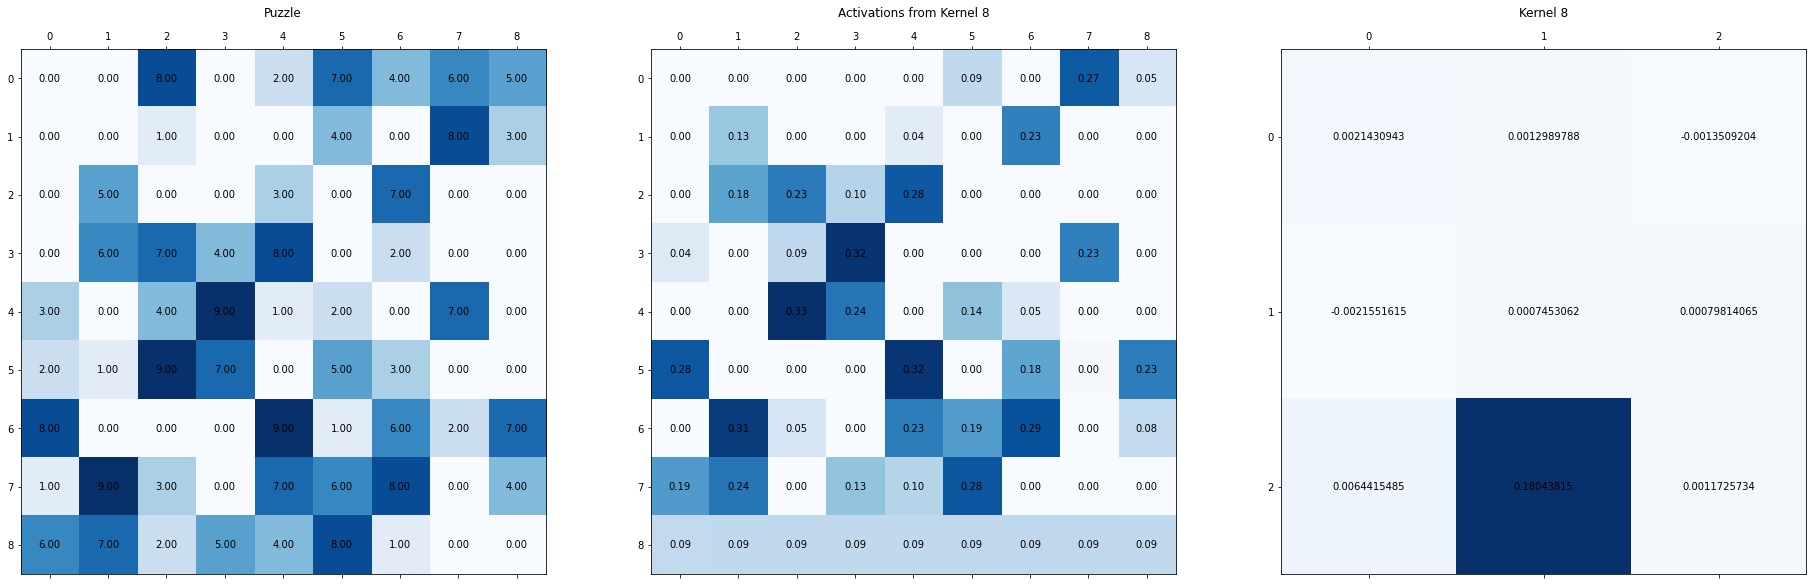

In [6]:
plot_conv1_kernel(example_puzzle, 8)

## Small Neighbor Detector

Looks for a small neighbor relative to the current cell

*This kernel activates cells that are small*

Kernel Bias: 0.06797855


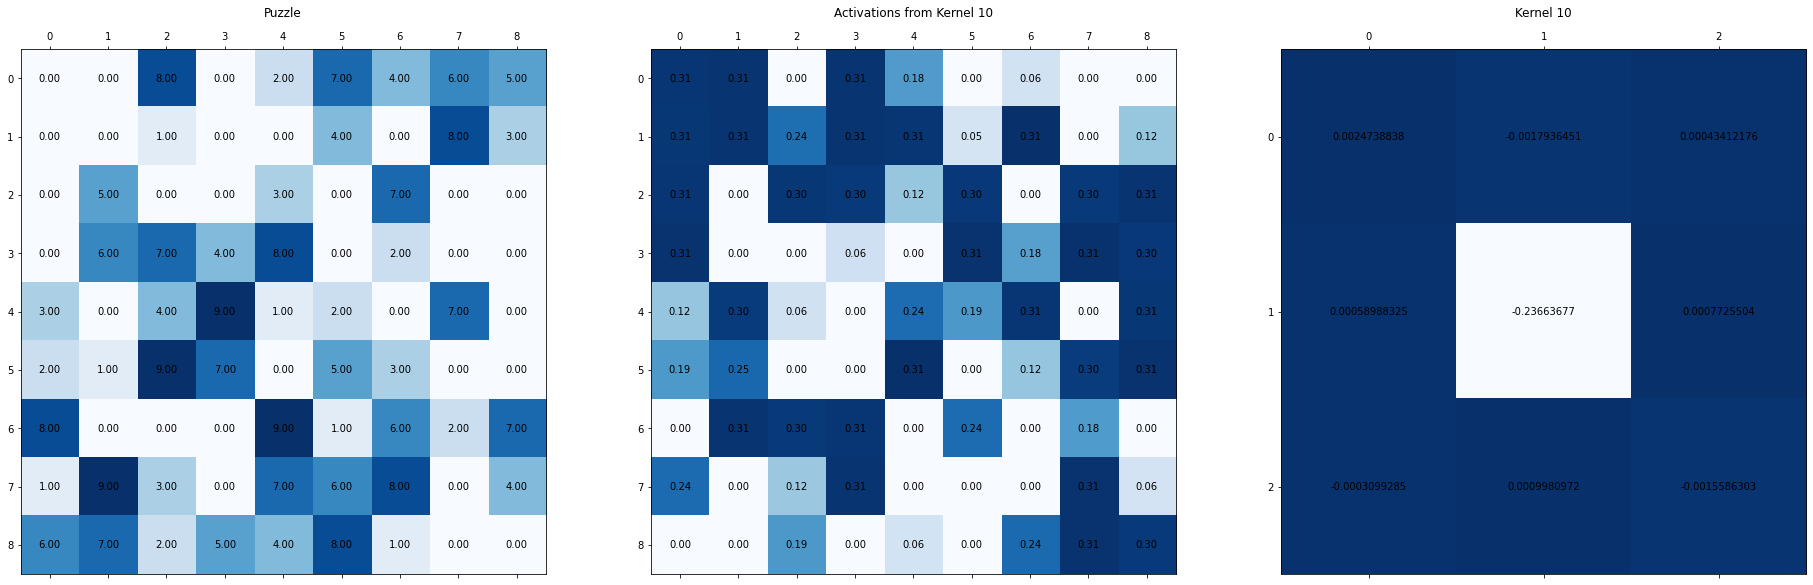

In [7]:
plot_conv1_kernel(example_puzzle, 10)

## Combined Large Feature Kernel

Searches for combined large features

*This kernel activates cells that have a large value and have a large value above* 

Kernel Bias: 0.04356332


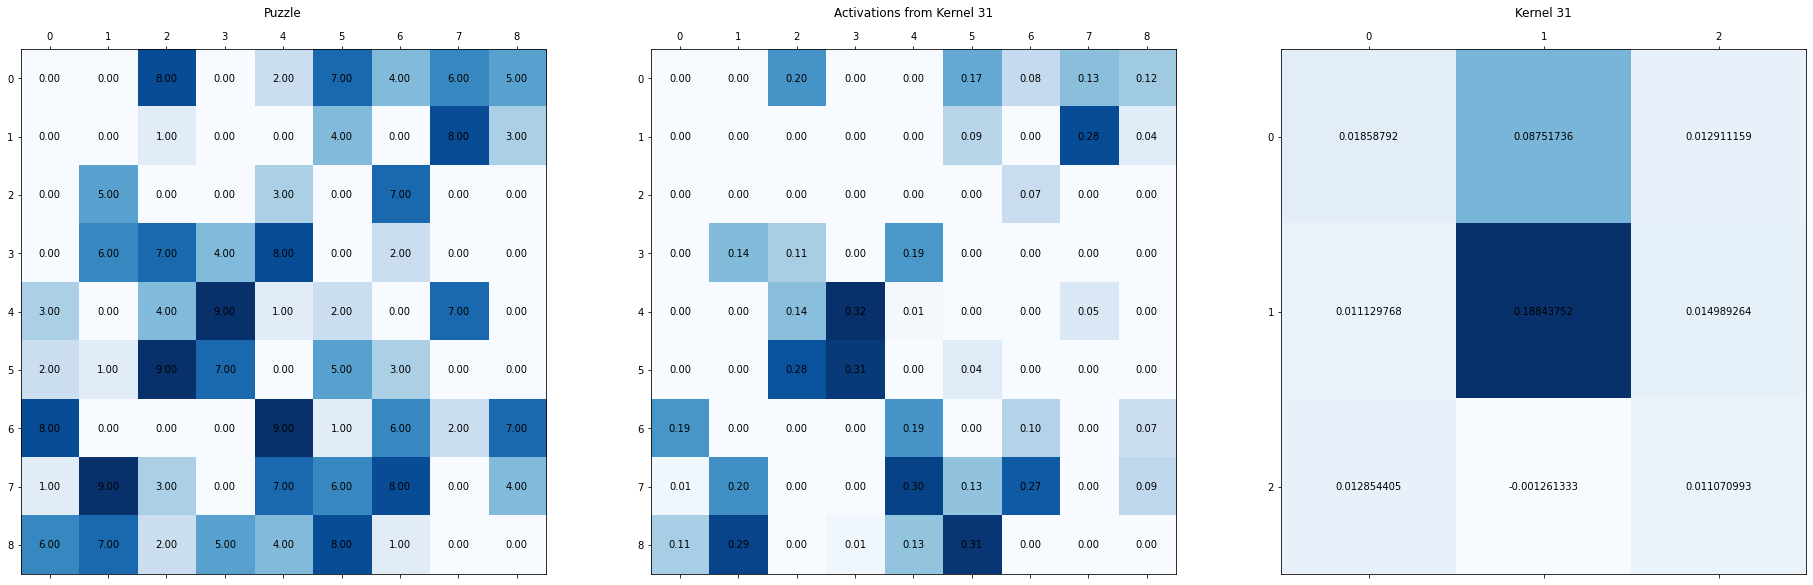

In [8]:
plot_conv1_kernel(example_puzzle, 31)

## Combined Small Feature Kernel

Searches for combined small features

*This kernel activates cells that have a small value and have a small value below* 

Kernel Bias: 0.22731122


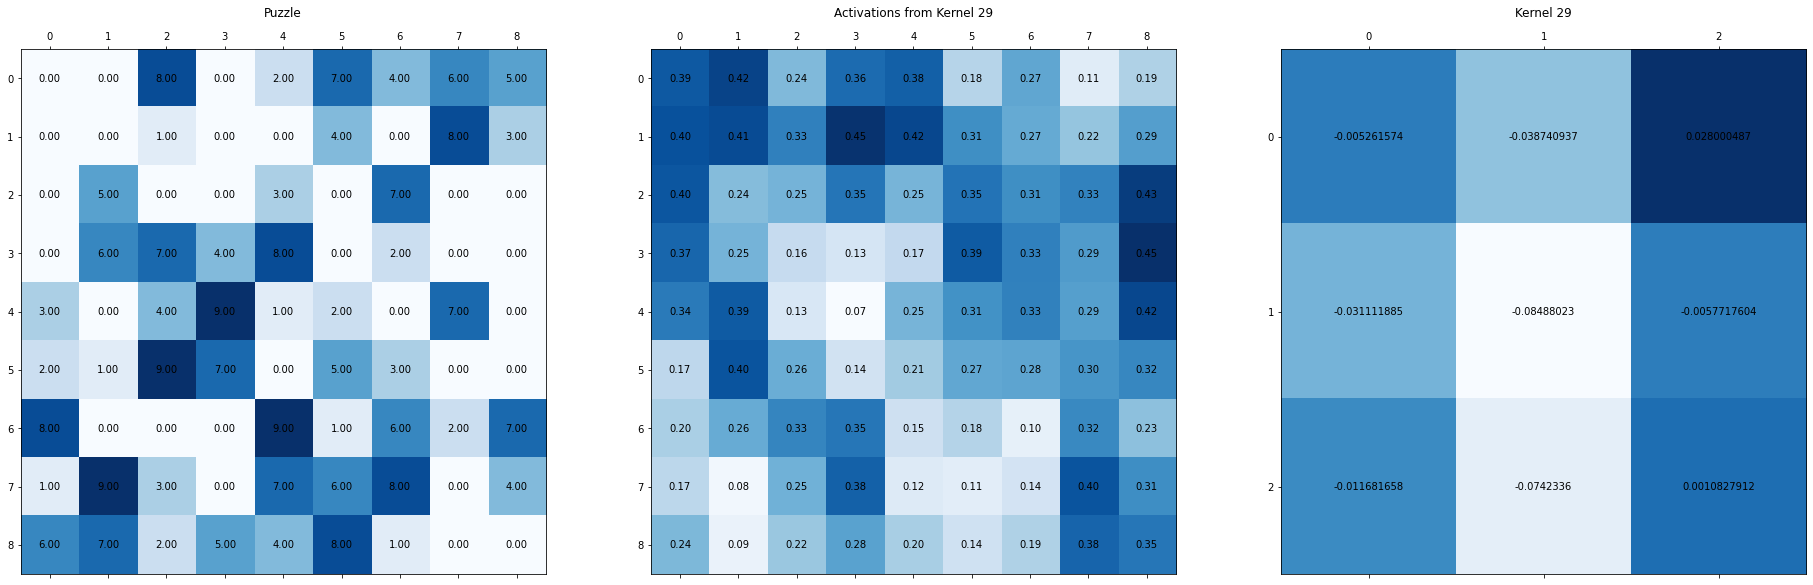

In [9]:
plot_conv1_kernel(example_puzzle, 29)

## Combined Large-Small Feature Kernel

Searches for a large feature at one location, and a small feature at another location

*This kernel activates cells that have a small value left, a small value above, with a large value to the top right* 

Kernel Bias: 0.22081058


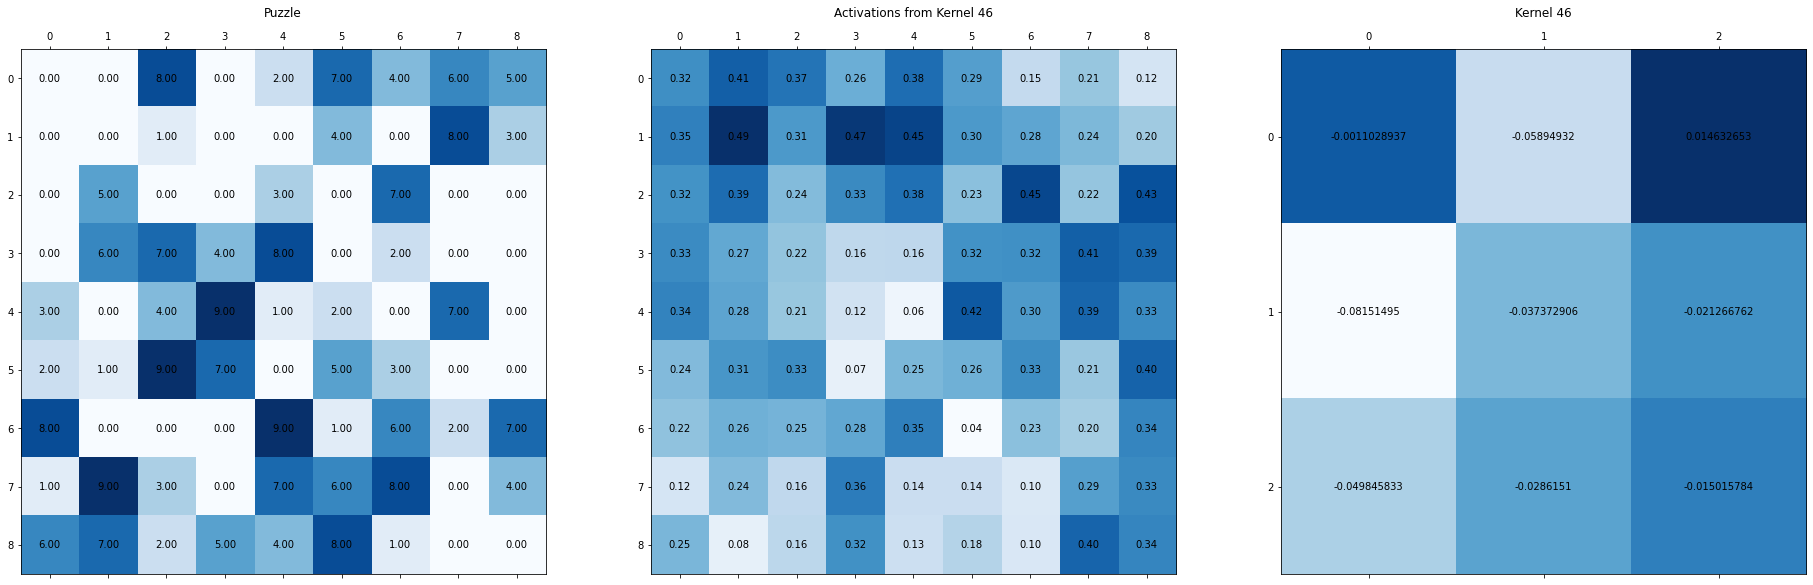

In [10]:
plot_conv1_kernel(example_puzzle, 46)

# Complexity Analysis of First Convolutional Layer

With these Kernel classifications, we can analyze the number of each type as a measure of model complexity and efficency:

In [11]:
# Plot each kernel and its activation - be warned, there are many of them!
#for i in range(64):
#  plot_conv1_kernel(example_puzzle, i)

| Detector Type | Filter Kernels of This Type |
| - | - |
|Large Feature Detectors| 1, 2, 3, 5, 6, 8, 9, 11, 12, 13, 14, 16, 17, 19, 21, 22, 24, 26, 27, 30, 34, 37, 40, 41, 42, 45, 49, 50, 51, 54, 55, 56, 57, 58, 59, 61, 63 | 
|Small Feature Detectors| 7, 10, 18, 20, 25, 32, 35, 36, 38, 39, 43, 44, 48, 52, 53, 62|
|Combined Large Feature Detectors| 31, 33, 47 |
|Combined Small Feature Detectors| 29, 60|
|Combined Large-Small Feature Detectors| 0, 4, 15, 23, 28, 46| 

We then consolidate this data into a single count of each type:

| Detector Type | Large Feature | Small Feature | Combined Large Feature | Combined Small Feature | Combined Large-Small Feature |
|-|-|-|-|-|-|
|Number of Filters | 37| 16 | 3 | 2 | 6 |

This table shows that there is a great deal of repetition: With a 3x3 kernel, there can only be 9 different Large Feature Detectors, and only 9 Small Feature Detectors; we have over 4 times as many Large Feature Detectors and nearly 2 times as many Small Feature Detectors. By the pigeonhole principle, we have repetition. Furthermore, any Combined Feature Detectors could be replicated by the intersection of two simpler (Large or Small) feature detectors. This suggests that this layer has more filters than are ncecessary.

*Note that for discussions on complexity, it may be worthwhile to condense all Combined Kernel Types to a single category, as all can be considered as a superposition of multiple primary (Large Feature, Small Feature) detectors).*


## Activations of Second Convolutional Layer

The second layer is responsible for extracting combinations of features found in the first layer. This layer is *much* more complicated, as it uses the basic activations in the first layer to extract more complicated patterns.

These layers are more difficult to understand, as they combine all of the features found in the previous layer. We can make this understanding easier by doing the following:

* Understanding the first convolutional layer
* Reducing a given second-layer filter to the most important (i.e. largest value) components
* Understanding a second-layer filter as the combination of those most important components

In [12]:
from keras.models import Model

c2_net = Model(inputs = model.inputs, outputs = model.layers[5].output)
c2_net.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9, 9)]            0         
                                                                 
 reshape (Reshape)           (None, 9, 9, 1)           0         
                                                                 
 batch_normalization_v1 (Bat  (None, 9, 9, 1)          4         
 chNormalization)                                                
                                                                 
 conv2d (Conv2D)             (None, 9, 9, 64)          640       
                                                                 
 batch_normalization_v1_1 (B  (None, 9, 9, 64)         256       
 atchNormalization)                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          3692

In [13]:
import matplotlib.gridspec as gridspec
plt.rcParams["figure.figsize"] = [32, 32]

def reshape_data(mat):
  data = []
  x, y, z = mat.shape
  for i in range(x):
    for j in range(y):
      for k in range(z):
        data.append([i, j, k, mat[i, j, k]])
  arr = np.array(data)
  return arr
  
# puzzle of shape (1, 9, 9)
def neighborhood_around(puzzle, x, y):
  return puzzle[0, x-1:x+2, y-1:y+2]

def paintPuzzle(puzzle, title=None):
  fig = plt.figure(figsize=(9, 9))
  ax = fig.add_subplot(111)
  ax.matshow(puzzle, cmap = plt.cm.Blues)
  for x in range(puzzle.shape[0]):
    for y in range(puzzle.shape[1]):
      ax.text(x, y, "{:.2f}".format(puzzle[y, x]), va='center', ha='center')
  ax.title.set_text(title)

def plot_conv2_kernel(puzzle, i):
  fig = plt.figure(figsize=(20, 6), dpi=80)
  feature1_maps = c1_net.predict(puzzle)
  feature_maps = c2_net.predict(puzzle)
  filters, biases = model.layers[5].get_weights()
  

	# specify subplot and turn of axis
  #ax = pyplot.subplot(square, square, ix)
  #pyplot.subplot(gs1[i])
  ax0 = fig.add_subplot(131)
  ax0.matshow(puzzle[0], cmap=plt.cm.Blues)
  for x in range(9):
    for y in range(9):
      ax0.text(x, y, "{:.2f}".format(puzzle[0, y, x]), va='center', ha='center')
  ax0.title.set_text("Puzzle")

  ax1 = fig.add_subplot(132)
  ax1.set_xticks([])
  ax1.set_yticks([])

	# plot filter channel in grayscale
  ax1.matshow(feature_maps[0, :, :, i], cmap=plt.cm.Blues)
  for x in range(9):
    for y in range(9):
      ax1.text(x, y, "{:.2f}".format(feature_maps[0, y, x, i]), va='center', ha='center')
  ax1.title.set_text("Activation of filter " + str(i))
  data = reshape_data(filters[:, :, :, i])
  ax = fig.add_subplot(133, projection='3d')
  ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=data[:, 3], cmap = plt.cm.Blues)
  ax.set_zlim3d(0, 64)
  ax.title.set_text("Filter " + str(i))
  fig.show()
  ind = np.unravel_index(np.argsort(filters[:, :, :, 3], axis=None), filters[:, :, :, 3].shape)

  print("The stacks containing large weights are: ", np.flip(ind[2])[:3])

  paintPuzzle(filters[:, :, 58, 3], "Slice 58 of filter 3 in the second convolutional layer")
  paintPuzzle(filters[:, :, 12, 3], "Slice 12 of filter 3 in the second convolutional layer")
  paintPuzzle(filters[:, :, 21, 3], "Slice 21 of filter 3 in the second convolutional layer")

To see how the second layer works, let's look at the fourth filter.

The stacks containing large weights are:  [58 12 21]


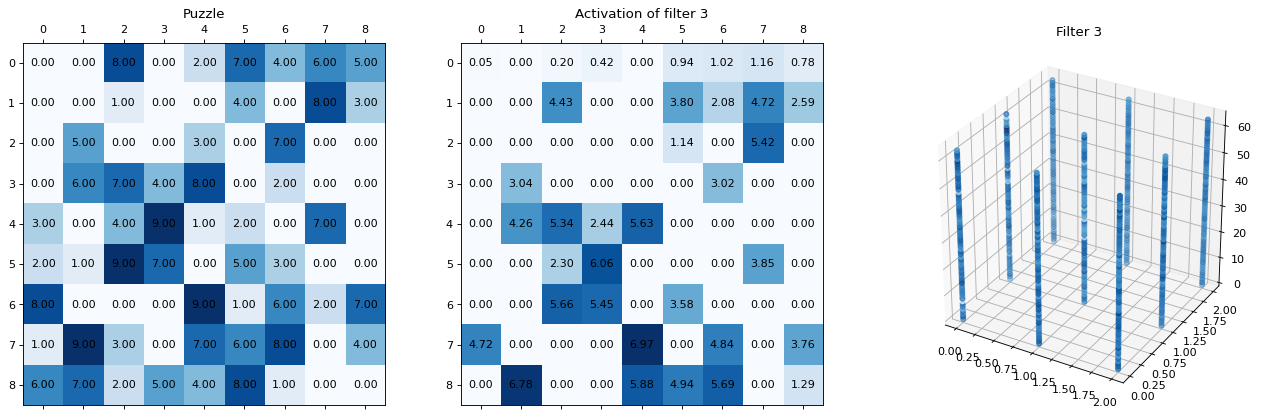

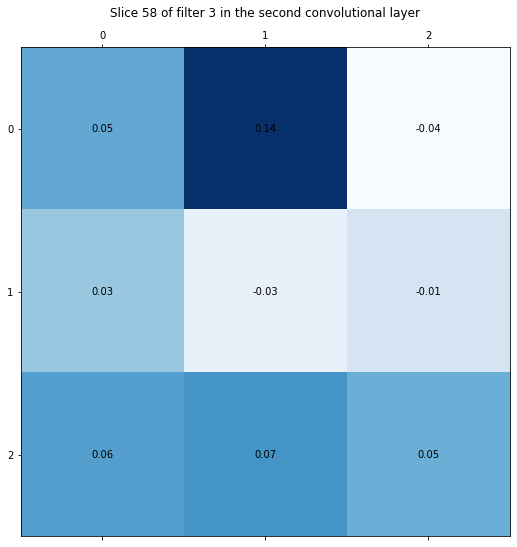

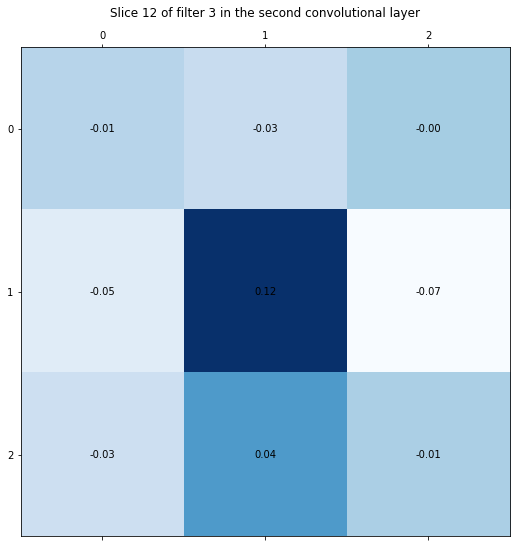

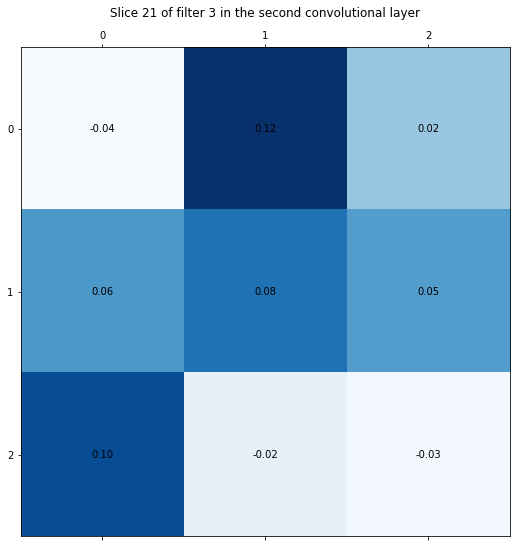

In [14]:
plot_conv2_kernel(example_puzzle, 3)

This filter really seems to be activated by the pixel at index (7, 4). This pixel, surrounded by its neighborhood, is

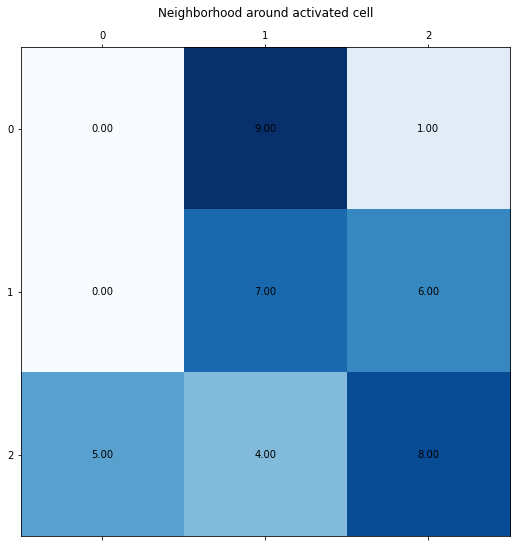

In [15]:
index_of_interest = (7, 4)
paintPuzzle(neighborhood_around(example_puzzle, 7, 4), "Neighborhood around activated cell")



We can find the patterns that this second layer is activating on by looking at the filter slices with large values:

The stacks containing large weights are:  [58 12 21]


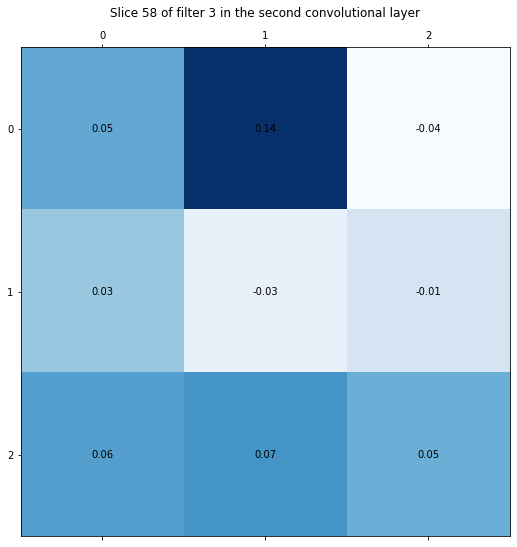

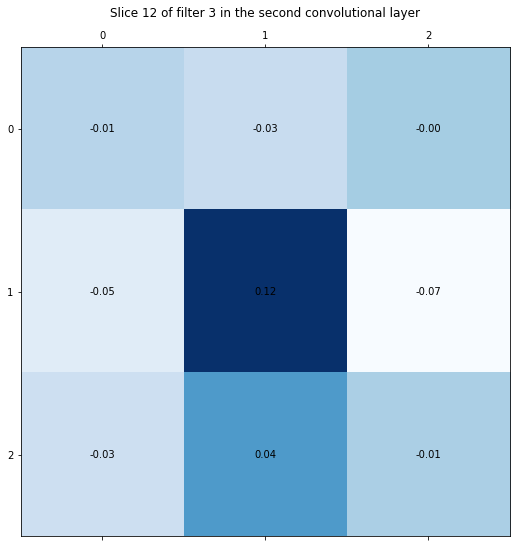

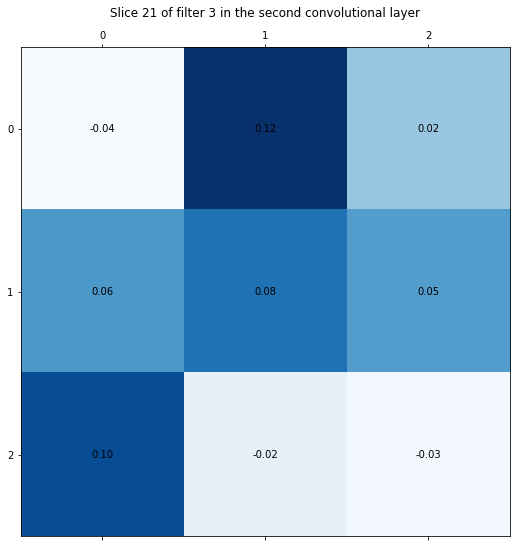

In [16]:
filters, biases = model.layers[5].get_weights()
ind = np.unravel_index(np.argsort(filters[:, :, :, 3], axis=None), filters[:, :, :, 3].shape)

print("The stacks containing large weights are: ", np.flip(ind[2])[:3])

paintPuzzle(filters[:, :, 58, 3], "Slice 58 of filter 3 in the second convolutional layer")
paintPuzzle(filters[:, :, 12, 3], "Slice 12 of filter 3 in the second convolutional layer")
paintPuzzle(filters[:, :, 21, 3], "Slice 21 of filter 3 in the second convolutional layer")


This is the kernel applied on top of the 58th kernel on the first dimensional layer. We can see that it activates when the output of the first kernel has a large value above. Below we see the activation on the 58th kernel of the first layer, which has a particularly large activation at cell (7, 3)

Kernel Bias: 0.08646858


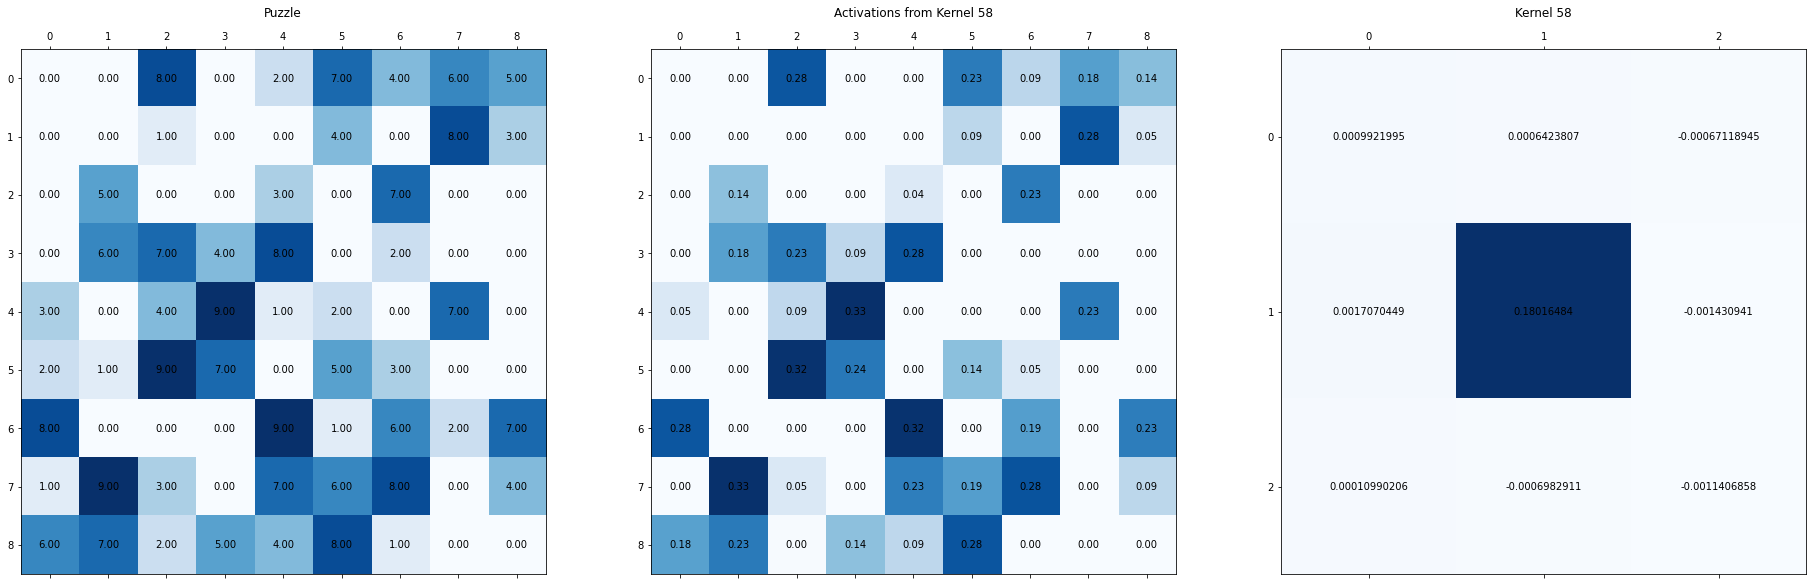

In [17]:
plot_conv1_kernel(example_puzzle, 58)

This is the kernel applied on top of the 12th kernel on the first dimensional layer. We can see that it activates when the output of the first kernel has a large value at the pixel of interest. Below we see the activation on the 58th kernel of the first layer, which has a particularly large activation at cell (7, 4)

Kernel Bias: 0.10001994


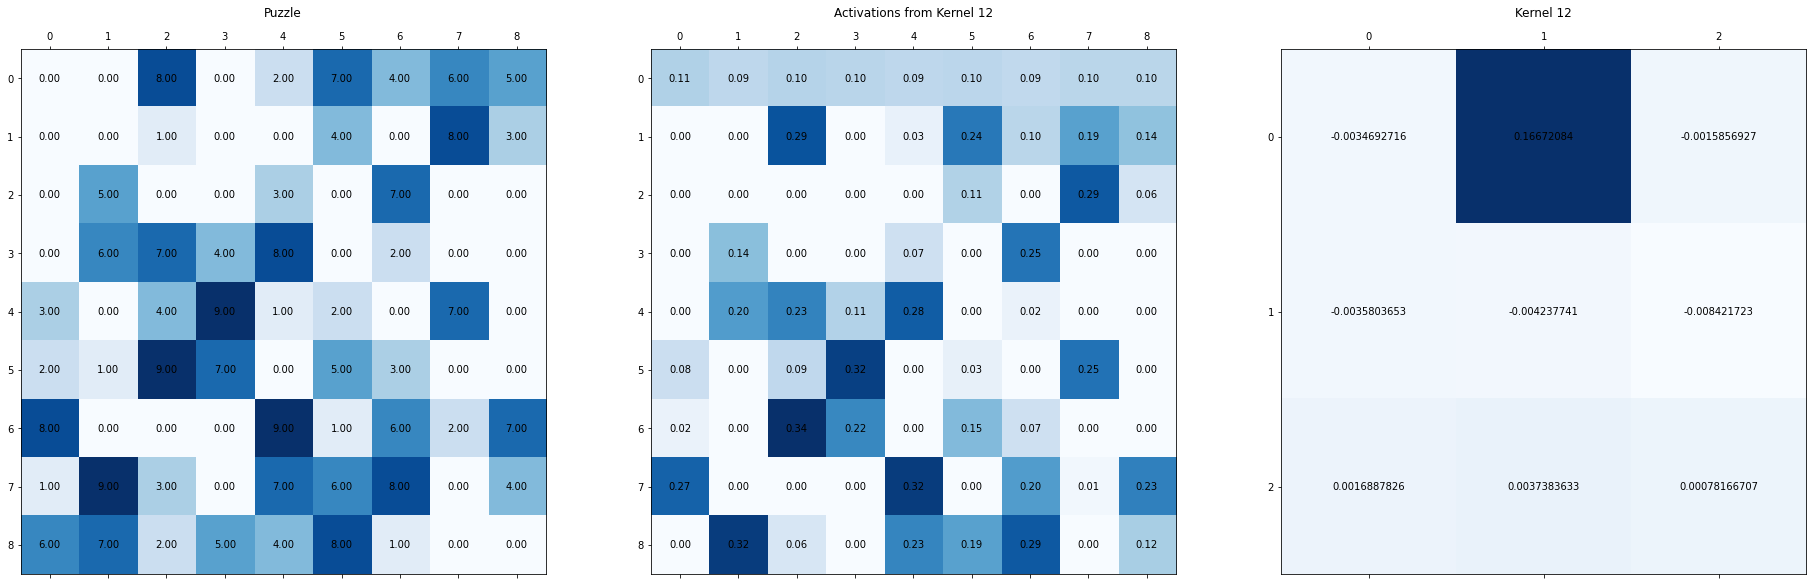

In [18]:
plot_conv1_kernel(example_puzzle, 12)

This is the kernel applied on top of the 21st kernel on the first dimensional layer. We can see that it activates when the output of the first kernel has a large value above the current cell, at the current cell, or at the cell to the bottom right. Below we see the activation on the 21th kernel of the first layer, which is somewhat activated at cells (8, 3) and (7, 4). It is not particularly activated at (6, 4).

Kernel Bias: 0.043243654


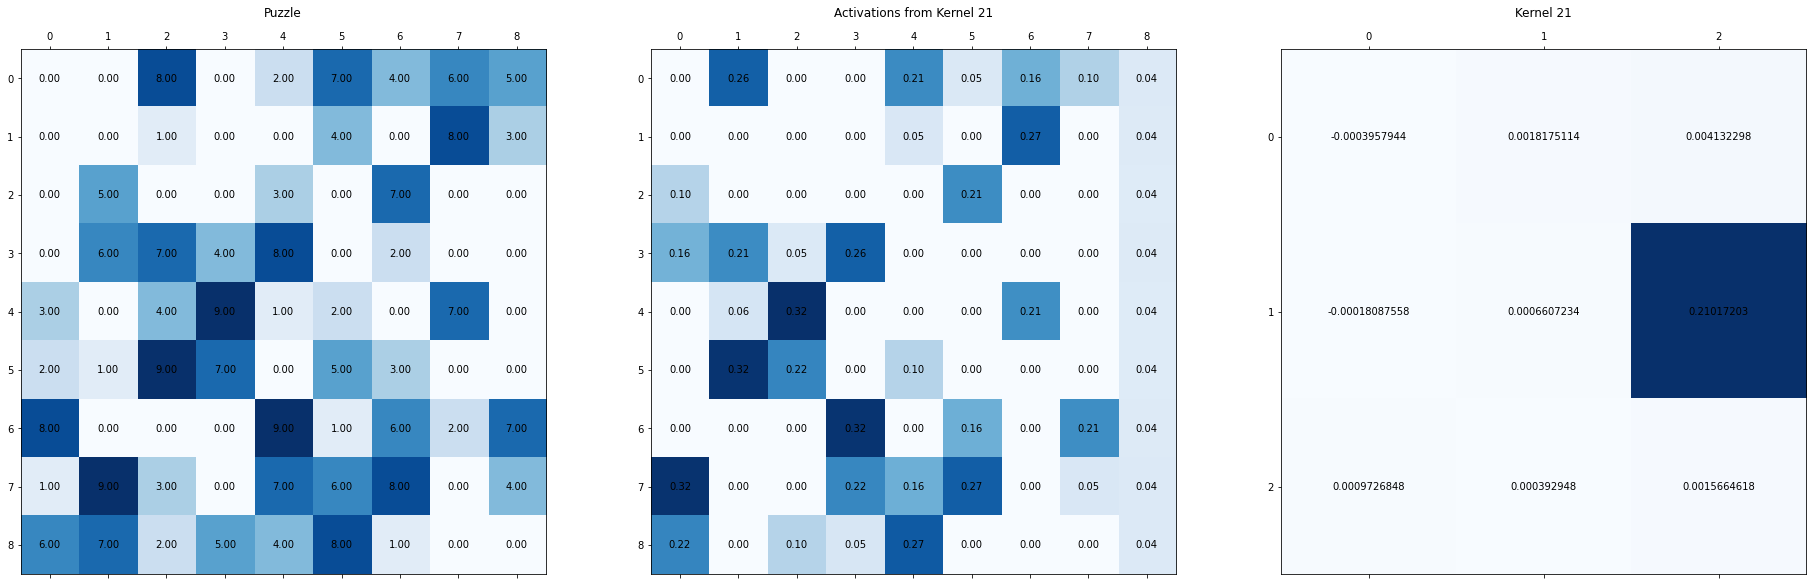

In [19]:
plot_conv1_kernel(example_puzzle, 21)

By looking at these kernels, we can see that the fourth filter has been trained to pick out large values that are also surrounded by large values. Since this is a 3x3 convolution **on top of** a 3x3 convolution, it is not limited to its immediate surroundings, but can pick up on limited information beyond that region.

## Activations of Final Convolutional Layer

This layer is made much easier to understand by the fact that each filter only operates on one cell per channel. Let's look at one:

In [20]:
from keras.models import Model

c3_net = Model(inputs = model.inputs, outputs = model.layers[7].output)
c3_net.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9, 9)]            0         
                                                                 
 reshape (Reshape)           (None, 9, 9, 1)           0         
                                                                 
 batch_normalization_v1 (Bat  (None, 9, 9, 1)          4         
 chNormalization)                                                
                                                                 
 conv2d (Conv2D)             (None, 9, 9, 64)          640       
                                                                 
 batch_normalization_v1_1 (B  (None, 9, 9, 64)         256       
 atchNormalization)                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          3692

In [21]:
from matplotlib.gridspec import GridSpec

def plot_conv3_kernel(puzzle, i):
  fig = plt.figure(figsize=(20, 6), dpi=80)
  gs = GridSpec(1, 3)
  plt.tight_layout()
  feature3_maps = c3_net.predict(puzzle)
  filters, biases = model.layers[7].get_weights()
  print("Bias: ", biases[i])
  

	# specify subplot and turn of axis
  #ax = pyplot.subplot(square, square, ix)
  #pyplot.subplot(gs1[i])
  ax0 = fig.add_subplot(gs[0, 0])
  ax0.matshow(puzzle[0], cmap=plt.cm.Blues)
  for x in range(9):
    for y in range(9):
      ax0.text(x, y, "{:.2f}".format(puzzle[0, y, x]), va='center', ha='center')

  ax1 = fig.add_subplot(gs[0, 1])
  ax1.set_xticks([])
  ax1.set_yticks([])

	# plot filter channel in grayscale
  ax1.matshow(feature3_maps[0, :, :, i], cmap=plt.cm.Blues)
  for x in range(9):
    for y in range(9):
      ax1.text(x, y, "{:.2f}".format(feature3_maps[0, y, x, i]), va='center', ha='center')
  ax1.title.set_text("Activation of filter " + str(i))
  data = reshape_data(filters[:, :, :, i])
  ax = fig.add_subplot(gs[0, 2])
  ax.title.set_text("Filter " + str(i))

  ax.scatter(range(64), filters[0, 0, :, i], cmap = plt.cm.Blues)
  fig.show()

We can see from the below plots that, using the filter whose channels are displayed on the right, the first filter is pretty good at picking out the clue 2s.

Bias:  -0.2651048


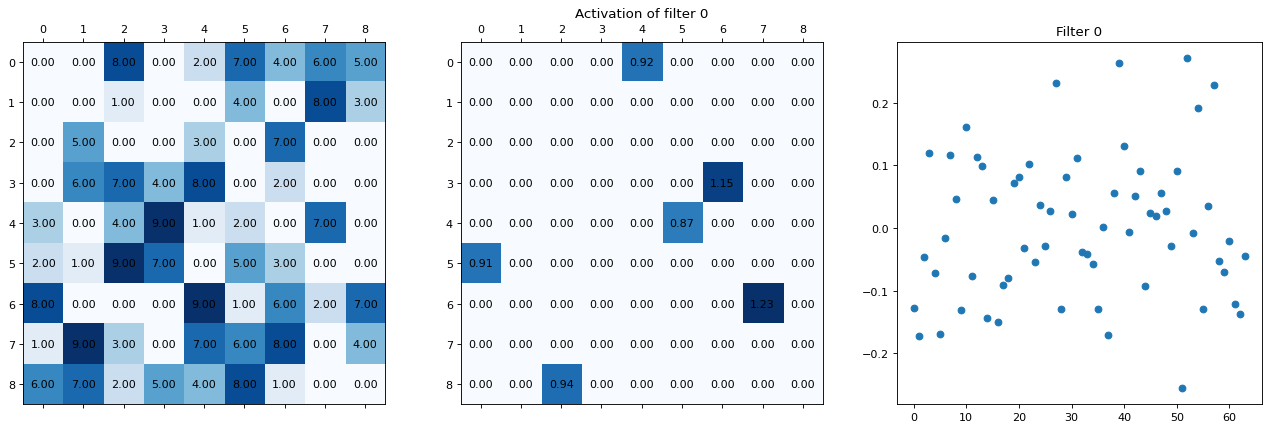

In [22]:
plot_conv3_kernel(example_puzzle, 0)

We can look at the features it picks out to establish 2s by looking at the features it uses:

In [23]:
filters, biases = model.layers[7].get_weights()
ind = np.unravel_index(np.argsort(filters[:, :, :, 0], axis=None), filters[:, :, :, 0].shape)

print("The stacks containing large weights are: ", np.flip(ind[2])[:5])
print("Also of note is the stack ", ind[2][0], " containing a large negative weight")


The stacks containing large weights are:  [52 39 27 57 54]
Also of note is the stack  51  containing a large negative weight


The 52nd output of the second convolutional layer is pretty good at picking out clue cells that have a small value

The stacks containing large weights are:  [58 12 21]


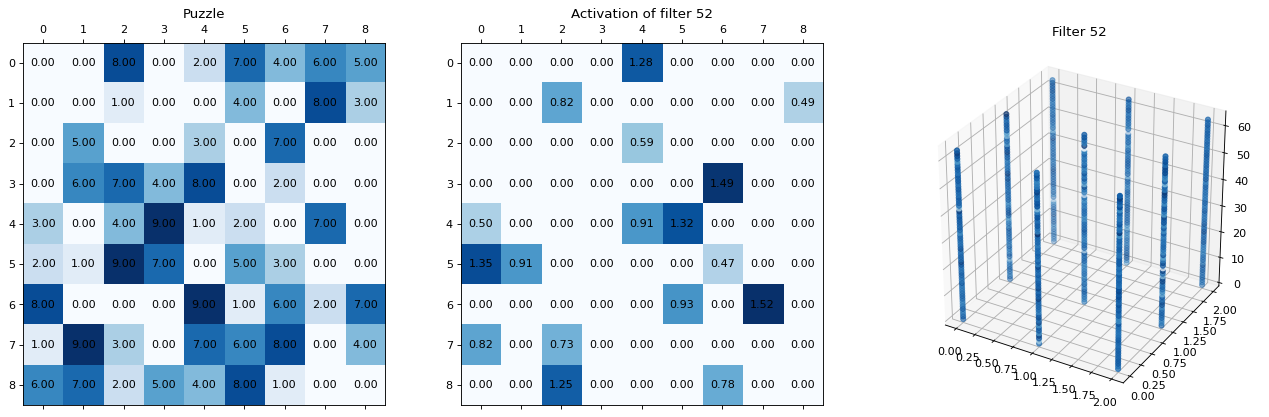

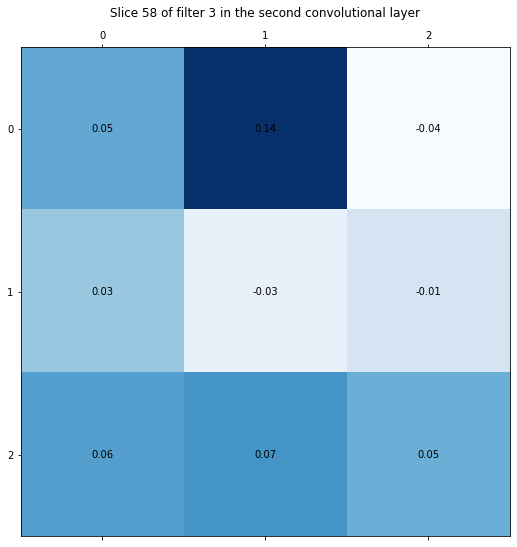

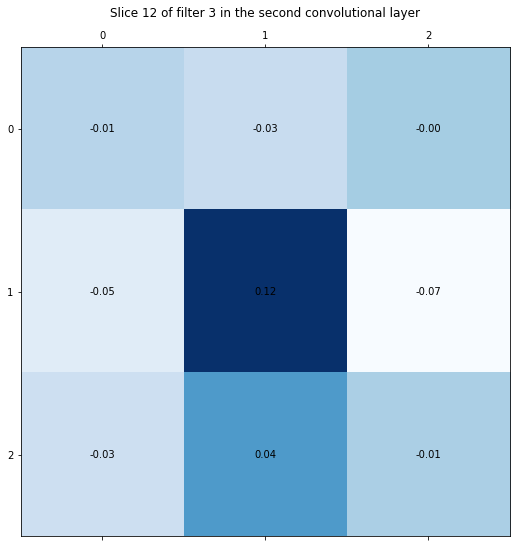

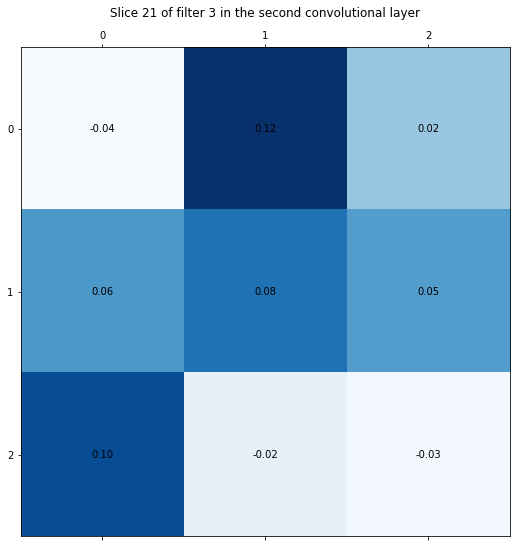

In [24]:
plot_conv2_kernel(example_puzzle, 52)

The 27th output of the second convolutional layer is good at finding all 0s, 1s, or 2s in the original puzzle.

The stacks containing large weights are:  [58 12 21]


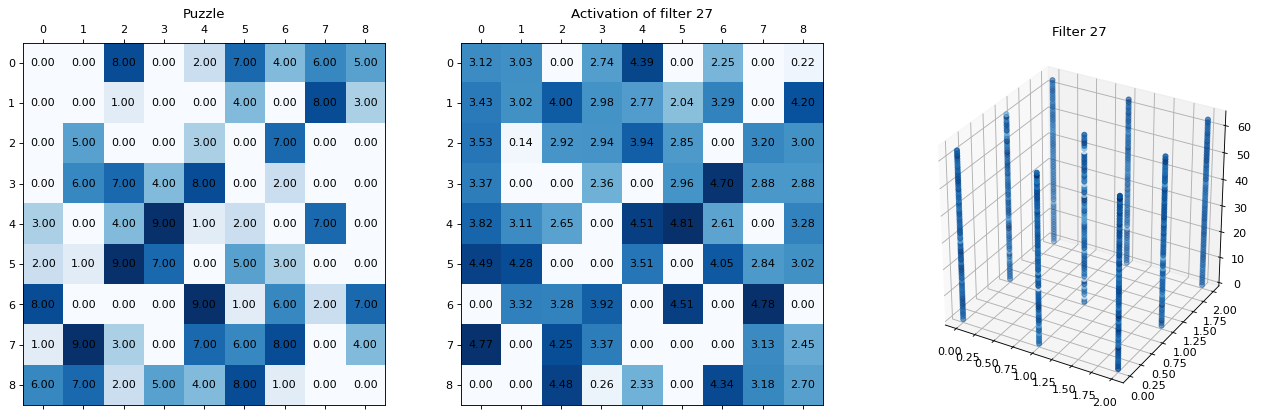

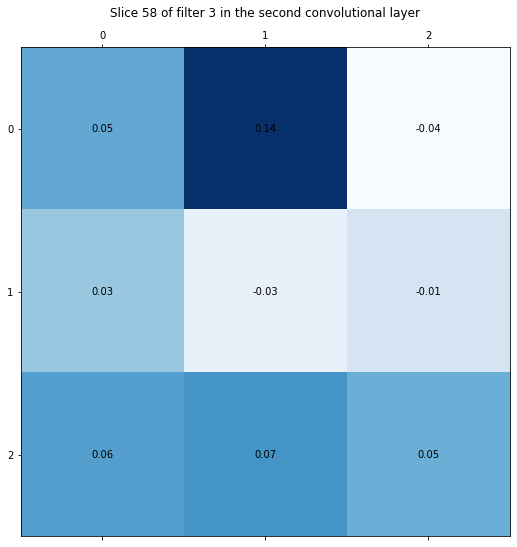

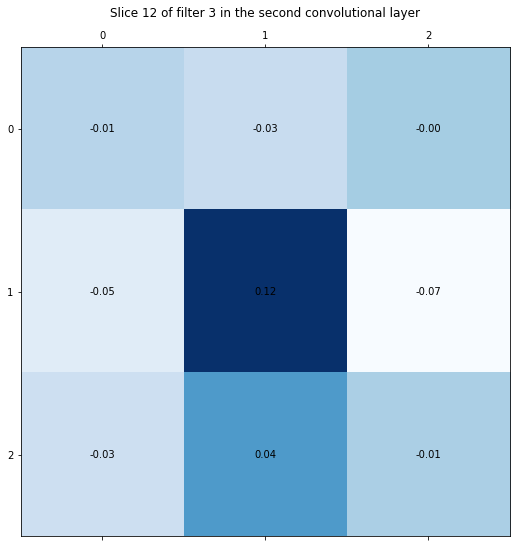

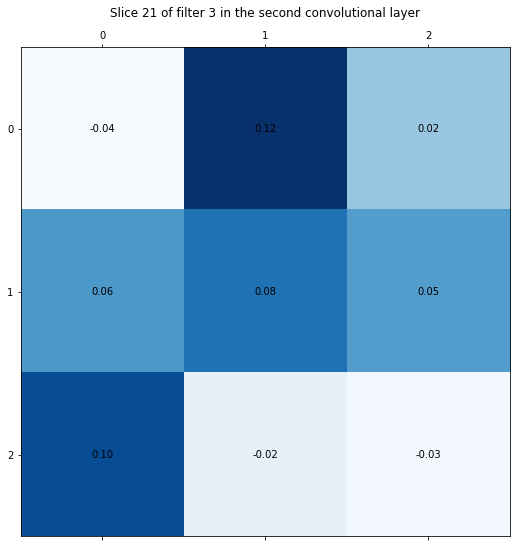

In [25]:
plot_conv2_kernel(example_puzzle, 27)

The 51st output seems to activate when a cell has a large value to its right

The stacks containing large weights are:  [58 12 21]


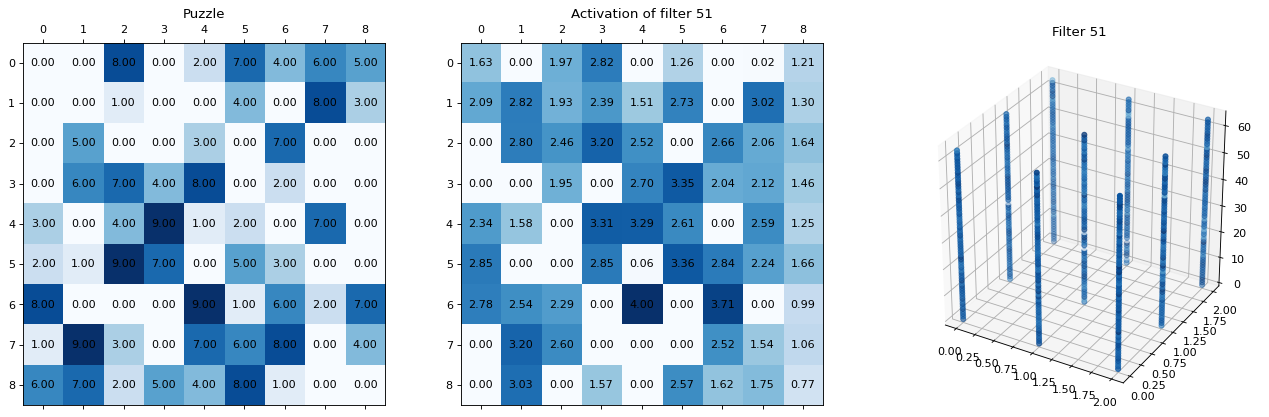

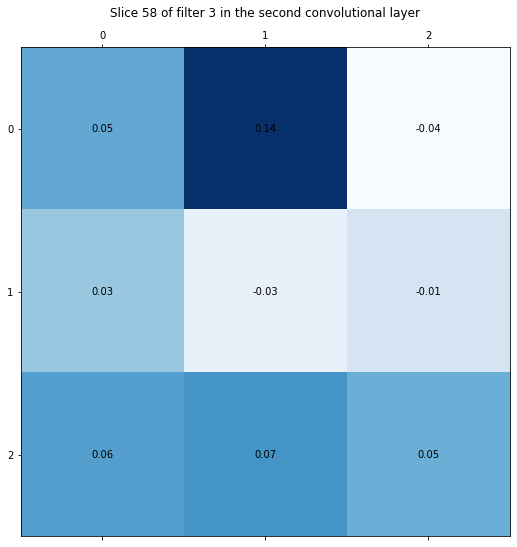

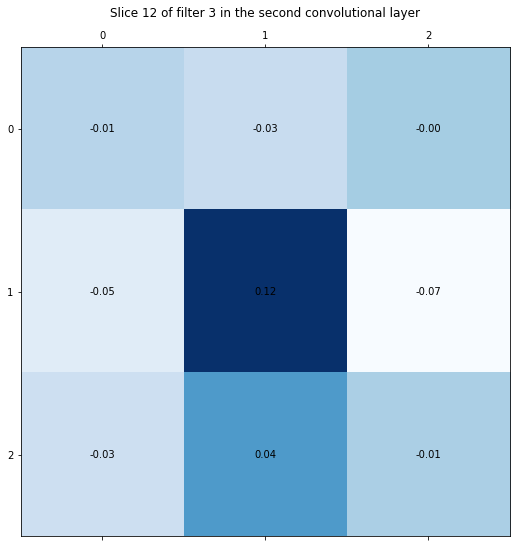

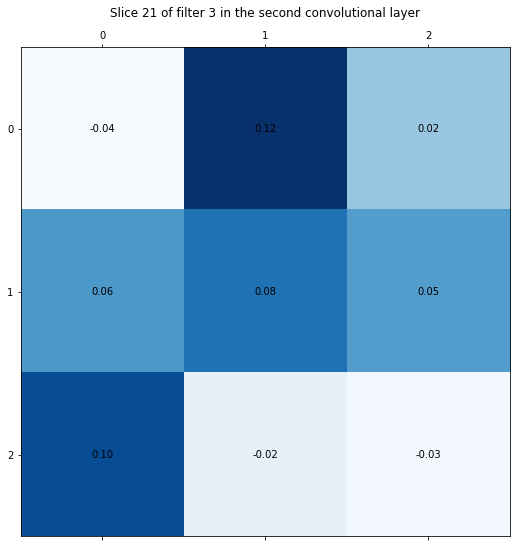

In [26]:
plot_conv2_kernel(example_puzzle, 51)

By creating a linear combination of these kernels, with a high bias, we get only the clue 2s.

Many of the other third-level convolution outputs are like this. Below we see that output 115 tends to find 4s and 3s.

Bias:  -0.050626244


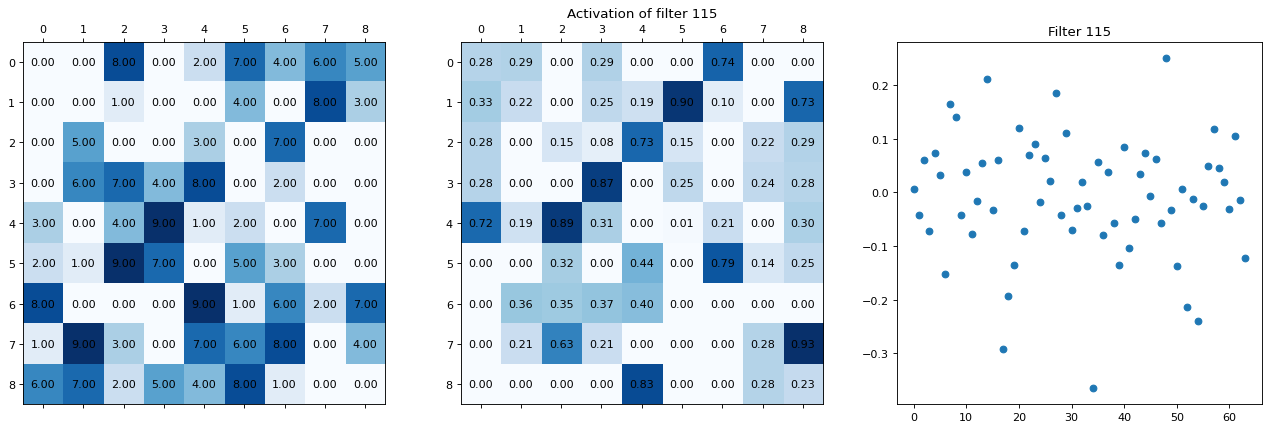

In [27]:
plot_conv3_kernel(example_puzzle, 115)

It is also worth noting that this kernel activates cells that don't have a clue, although not to the amount that it does those with clues.

See how this kernel activates cells (6,1) and (6,2), which have no clue. from the rules of Sudoku, we know that one of these two cells must contain a 4. These high activations indicate that the CNN "knows" this as well. But this is not perfect. Surrounding cells are also activated, although a 4 cannot be placed there. And furthermore, by cell (4, 2) we know that cell (6, 2) cannot contain a 4. We can only hope that other outputs from this layer try to prevent a 4 from being predicted in that cell.

# Activations of Dense Layer

This layer is pretty self-explanatory.

We have a (9x9x9) output from the network, where the first two dimensions correspond to the puzzle dimensions, and the third dimension corresponds to the label vector for that cell. This vector is softmaxed.

The dense layer's job is to agglomerate all data from the third convolutional layer. For example, the neurons corresponding to the (9x9x1) slice of the output corresponding to class to should use positive weights on inputs that suggest a 2 in that location, and negative weights on inputs that suggest that the cell should not be a 1, 3, 4, 5, 6, 7, 8, or 9.

A graphic here would be really cool, but I'm not sure how to gather this data... :(

# Where the CNN works well

* When there are more clues

This is pretty obvious. The kernels we saw above look for large values, small values, values in a certain orientation, etc. The more of these values you provide, the more large values you will get out of the activation that help to confirm clues in the prediction and rule out invalid values in the blank cells.

* When clues are uniformly distributed

Consider the case in which we remove the right three columns of the puzzle. This prediction will, on average, be worse **(test this)** than if we removed three columns worth of cells randomly across the board. This is because the operations of the CNN are based in neighborhoods, and the cell can only do so much in predicting from nothing (those three empty columns are nearly indistinuishable from the three rightmost columns of a blank puzzle, and the information contained in the full rows to the left can only reach so far into the empty cells as the puzzle goes through the layers).

# Why the CNN works well

* Wide Convolution Layers

With the *large* number of kernels in each layer, we can extract simpler patterns. This provides for more flexibility in the later layers, as it is less complicated to combine these layers in deeper layers.

* Batch normalization

This allows for stronger activation, especially with regard to smaller digits. By mapping the smaller digits to large negative numbers, instead of smaller positive numbers, these smaller digits are easier to use in activations. Kernel weights would be hard to set without the normalization before/after each convolution layer.


# Improvements

We cannot modify the number of clues, or their placement in the puzzle. What we do know, however, is that sudoku rules provide large-scale patterns that could do well to decrease the effects of clue distribution. Specifically, we know that:
* Digits cannot appear more than once per row
* Digits cannot appear more than once per column

We saw above that the different filters are used to activate a cell in a particular output when a particular clue "range" is "close", where "close"-ness is a function of our kernel. For example, we saw the "Small Neighbor Detector" kernel type in the first convolutional layer. 

So what if we redefine our measure of "close"-ness? In other words, what if a filter could act as a "Small Neighbor Detector" for a location along the row? This would not require a change in the way the model works, only a change in the kernel size!

## Options to explore

* CNN layer with Rectangular (row-sized or column-sized) kernels in addition to / in place of square kernels
* LSTM layer to operate along each row or column.

# Parting notes

Finally, let's show how bad the CNN can be at solution approximation when the clues are irregularly distributed. We will go to the extreme, where the entire bottom half of the puzzle consists of blanks and the top half is entirely clues:

In [28]:
import numpy as np

def model_input(input):
  return np.expand_dims(input,axis=0)

hard_puzzle_data_save_name = 'rows_10.npz'
hard_path = F"/content/drive/Shared drives/Neural Networks/Group Project/{hard_puzzle_data_save_name}"
hard_puzzle_data = np.load(hard_path)
hard_quizzes, hard_solutions = hard_puzzle_data['quizzes'], hard_puzzle_data['solutions']

hard_test_index = 0
hard_example_puzzle = model_input(hard_quizzes[test_index])
hard_example_solution = hard_solutions[test_index]
hard_prediction = model.predict(hard_example_puzzle)
hard_argmaxed = np.argmax(hard_prediction, axis = -1) + 1
hard_pred = np.reshape(hard_argmaxed, (9, 9))
print("Example puzzle: \n", hard_example_puzzle)
print("Prediction: \n", hard_pred)
print("Solution: \n", hard_example_solution)
print("Incorrect blanks: ", np.count_nonzero(hard_pred - hard_example_solution))



Example puzzle: 
 [[[1 8 3 5 2 4 7 6 9]
  [6 7 9 3 8 1 2 4 5]
  [4 2 5 9 7 6 8 1 3]
  [2 9 4 6 3 7 5 8 1]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0]]]
Prediction: 
 [[1 8 3 5 2 4 7 6 9]
 [6 7 9 3 8 1 2 4 5]
 [4 2 5 9 7 6 8 1 3]
 [2 9 4 6 3 7 5 8 1]
 [7 1 1 1 5 5 3 2 2]
 [8 5 7 1 1 5 9 7 7]
 [9 6 7 1 6 5 9 3 8]
 [9 5 2 7 5 8 1 9 8]
 [8 4 7 2 5 3 4 5 6]]
Solution: 
 [[1 8 3 5 2 4 7 6 9]
 [6 7 9 3 8 1 2 4 5]
 [4 2 5 9 7 6 8 1 3]
 [2 9 4 6 3 7 5 8 1]
 [8 5 1 4 9 2 3 7 6]
 [7 3 6 1 5 8 9 2 4]
 [9 6 2 7 1 3 4 5 8]
 [5 4 8 2 6 9 1 3 7]
 [3 1 7 8 4 5 6 9 2]]
Incorrect blanks:  36


With (9*5)=45 blanks, we are getting an accuracy of (9/45)=0.20. This is really bad. Especially bad in this case is the amount of digit repetition in rows: the first row has two 8s and two 9s in the five predicted cells, and the third row has three 7s in the five predicted cells.

Let's see how the activation functions are altered:

The stacks containing large weights are:  [58 12 21]


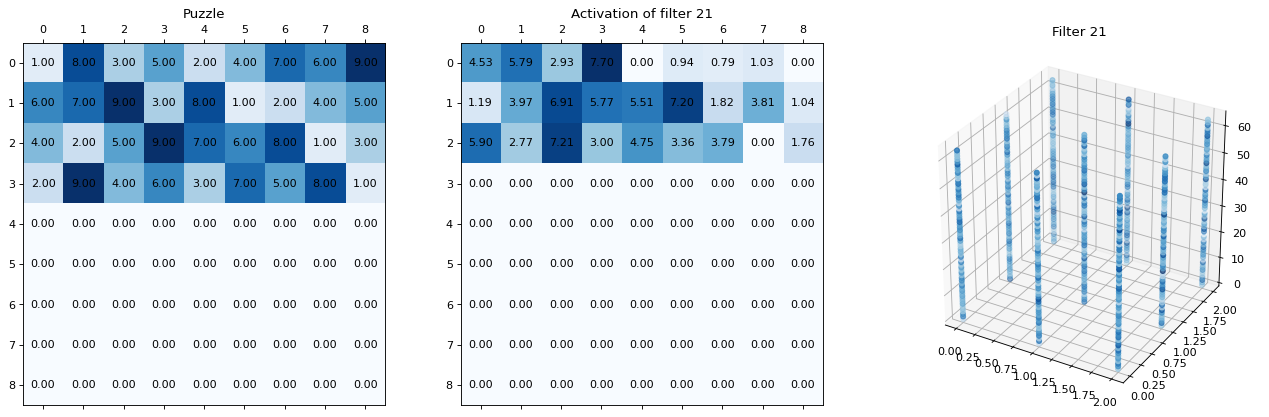

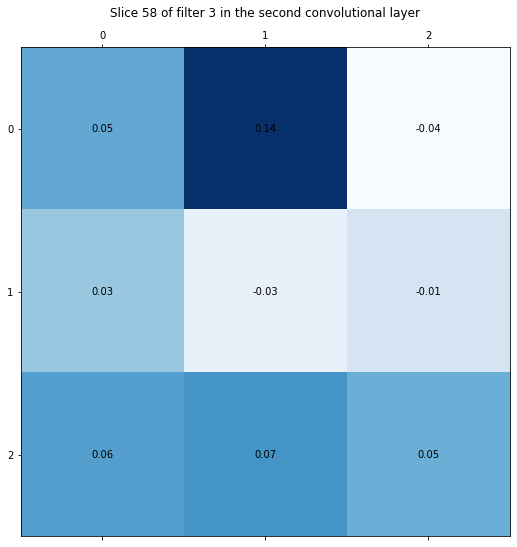

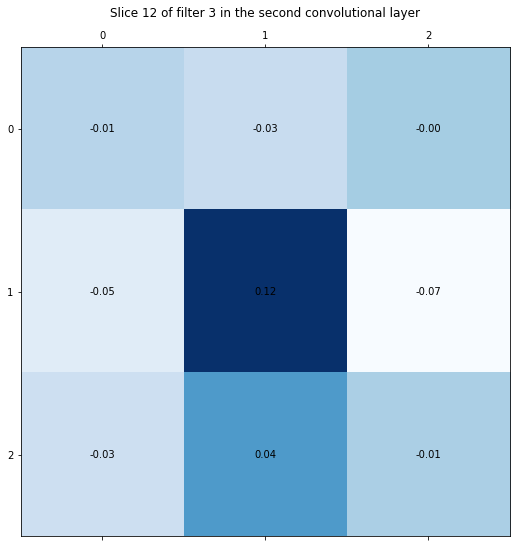

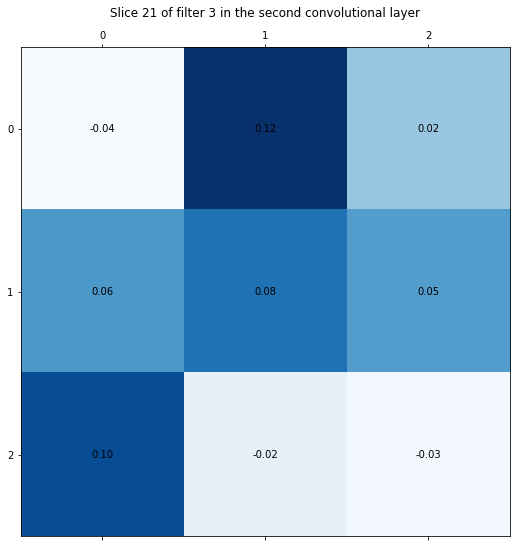

In [29]:
plot_conv2_kernel(hard_example_puzzle, 21)

There is **no** activation below the five rows, which makes sense as all inputs are zero. If we could ensure that some of the inputs are nonzero, we might receive better results for these sparser regions...